# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading all the images(as pixel values)

In [2]:
DATA_DIR = './PetImages'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50
data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category) #path to cat dog dir
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), 0)
            new_arr = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            data.append([new_arr, class_num])
        except Exception as e:
            pass

        
    
        

In [3]:
#checking shape og images stored
np.shape(data)

(24946, 2)

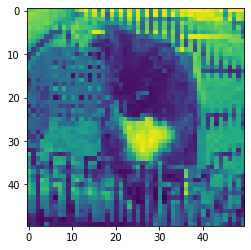

In [4]:
#viewing some values
plt.imshow(data[2][0])

# Separating features and labels and reshaping features

In [5]:
x = []
y = []
for feature, label in data:
    x.append(feature)
    y.append(label)
#reshaping
x = np.array(x).reshape(-1,50,50,1)

In [6]:
#checking labels value counts
np.unique(y, return_counts=True)

(array([0, 1]), array([12476, 12470]))

In [7]:
np.isnan(x).sum()


0

# Converting to categorical

In [8]:
import keras

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [9]:
y = keras.utils.to_categorical(y)

In [10]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
#checking shape
np.shape(x)

(24946, 50, 50, 1)

# Spliting the data into train and test


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

In [13]:
np.shape(x_train)

(22451, 50, 50, 1)

# With data augmentation to prevent overfitting

In [14]:
from keras.preprocessing.image import ImageDataGenerator




datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# CNN

In [15]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,Activation
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(54, 3,activation='relu',data_format='channels_last', input_shape=(50,50,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Dense(2, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 54)        540       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31104)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1990720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
_________________________________________________________________
dense_3 (Dense)              (None, 2)               

In [16]:
x.shape[1:]

(50, 50, 1)

# Spliting the data into train and validation

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

# Fitting the data into CNN

In [18]:

batch_size = 64
epochs = 50
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                            
                              )


Epoch 1/50
316/316 [==============================] - 35s 111ms/step - loss: 23.7966 - accuracy: 0.5723 - val_loss: 2.2900 - val_accuracy: 0.5810
Epoch 2/50
316/316 [==============================] - 33s 104ms/step - loss: 0.9250 - accuracy: 0.5984 - val_loss: 1.1112 - val_accuracy: 0.6527
Epoch 3/50
316/316 [==============================] - 33s 105ms/step - loss: 0.7863 - accuracy: 0.6121 - val_loss: 1.1410 - val_accuracy: 0.6264
Epoch 4/50
316/316 [==============================] - 33s 105ms/step - loss: 0.7331 - accuracy: 0.6172 - val_loss: 1.0320 - val_accuracy: 0.6327
Epoch 5/50
316/316 [==============================] - 33s 105ms/step - loss: 0.7030 - accuracy: 0.6130 - val_loss: 0.9256 - val_accuracy: 0.6358
Epoch 6/50
316/316 [==============================] - 33s 105ms/step - loss: 0.6872 - accuracy: 0.6126 - val_loss: 0.8577 - val_accuracy: 0.6394
Epoch 7/50
316/316 [==============================] - 33s 105ms/step - loss: 0.6834 - accuracy: 0.6057 - val_loss: 0.8059 - val_

# Predicting values 

In [19]:
y_pred = model.predict(x_test)

# checking the accuracy of the model

In [20]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.6392785571142284

# Plotting training loss vs validation loss

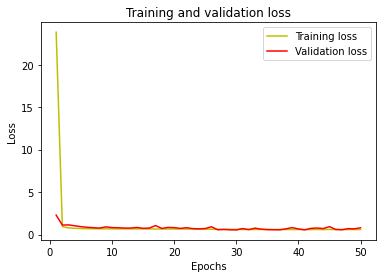

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training accuracy vs validation accuracy

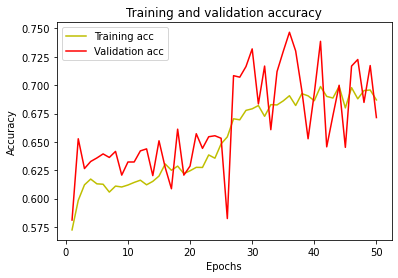

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()